<a href="https://colab.research.google.com/github/RoshanPanda/pytorch/blob/master/Aus_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
cd roshan/

[Errno 2] No such file or directory: 'roshan/'
/content/roshan/My Drive


In [208]:
cd 'My Drive'

[Errno 2] No such file or directory: 'My Drive'
/content/roshan/My Drive


In [0]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader, TensorDataset
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

**We will try to predict using feed forward neural net with pytorch and random forest.**

In [0]:



weather_data=pd.read_csv("weatherAUS.csv")


In [212]:
weather_data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [213]:
weather_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [214]:
weather_data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

<Figure size 720x576 with 0 Axes>

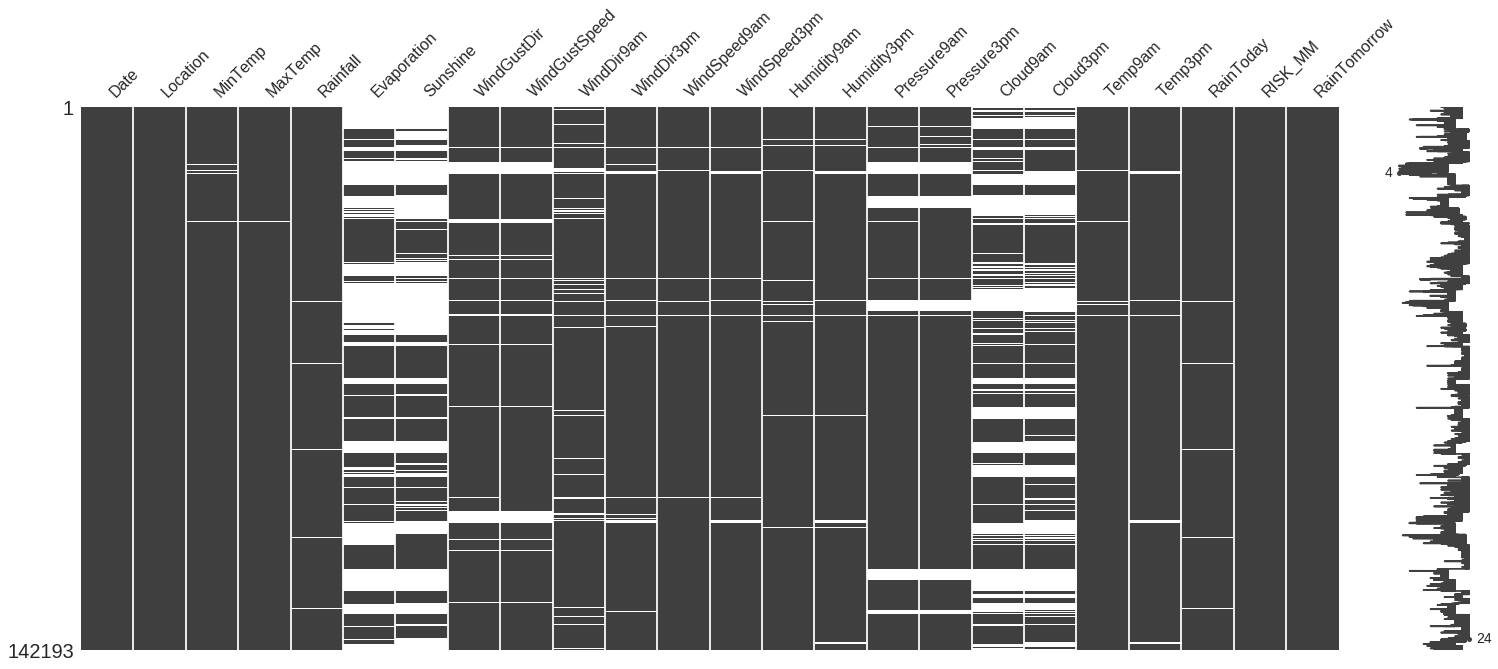

In [215]:
import missingno as mn
plt.figure(figsize=[10,8])
mn.matrix(weather_data)

In [0]:
#required_columns.shape
weather_forest=weather_data.drop(["Evaporation","Sunshine","Cloud9am","Location","Cloud3pm"],axis=1)

In [217]:
weather_forest.isnull().sum()


Date                 0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [0]:

#imp=preprocessing.Imputer(missing_values='NaN',strategy='median',axis=0)

In [0]:
weather_forest_final=weather_forest.dropna(how='any')
#imp.fit(weather_forest)

In [220]:
weather_forest_final.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [0]:
#training,testing=train_test_split(weather_forest_final,test_size=0.2, random_state=42)

In [0]:
x=weather_forest_final[weather_forest_final.columns[:-1]]
y=weather_forest_final[weather_forest_final.columns[-1]]

In [223]:
y.head()

0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

In [224]:
x["RainToday"].replace({'No':0,'Yes':1},inplace=True)
y.replace({'No':0,'Yes':1},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
x = pd.get_dummies(x, columns=['WindGustDir', 'WindDir3pm', 'WindDir9am'])

In [0]:
x.set_index("Date",inplace=True)


In [0]:
corr_matrix=x.corr()

In [228]:
corr_matrix[corr_matrix["RainToday"]>0.1]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
Rainfall,0.103807,-0.076825,1.000000,0.130388,0.085376,0.060288,0.238756,0.259652,-0.167595,-0.126520,...,-0.003549,0.002749,0.029608,-0.007525,0.007474,0.029184,0.042178,0.024201,0.016591,0.030381
WindGustSpeed,0.159176,0.056742,0.130388,1.000000,0.589735,0.679223,-0.183729,-0.020903,-0.445046,-0.399751,...,0.063264,0.043166,-0.013690,-0.041476,-0.030468,-0.016644,-0.035478,0.045339,0.028946,0.005346
Humidity9am,-0.218312,-0.517188,0.238756,-0.183729,-0.221500,-0.093364,1.000000,0.684373,0.115345,0.168052,...,0.038141,0.040163,0.037603,-0.041232,0.001911,0.041352,0.050569,0.051437,0.047073,0.052572
Humidity3pm,0.026733,-0.497679,0.259652,-0.020903,-0.017875,0.053916,0.684373,1.000000,-0.035468,0.046073,...,0.049741,0.047711,0.039623,-0.037351,0.008410,0.053791,0.061806,0.050231,0.044357,0.051400
RainToday,0.044605,-0.242983,0.497554,0.154943,0.099773,0.087702,0.378306,0.386619,-0.188677,-0.104902,...,0.018932,0.022151,0.032050,-0.037324,-0.004323,0.047698,0.075793,0.070374,0.040175,0.076635
RISK_MM,0.126769,-0.044029,0.317690,0.160990,0.065844,0.048704,0.181815,0.315964,-0.158379,-0.159886,...,0.007844,-0.002600,0.009682,-0.007690,-0.003644,-0.001303,0.004320,-0.006464,-0.000699,-0.006408


In [229]:
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled=pd.DataFrame(min_max_scaler.fit_transform(x), columns=x.columns)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
#rfe=RFE(estimator=RandomForestClassifier,n_features_to_select=6,step=1)


In [0]:
from sklearn.feature_selection import SelectKBest,chi2
selector=SelectKBest(chi2,k=6)
selected_features=selector.fit(x_scaled,y)
indices_selected=selected_features.get_support(indices=True)
columns_selected=[x.columns[i] for i in indices_selected]
xval=x[columns_selected]

In [231]:
xval.head()

,Rainfall,Humidity9am,Humidity3pm,RainToday,RISK_MM,WindDir9am_N
Date,,,,,,
2008-12-01,0.6,71.0,22.0,0,0.0,0
2008-12-02,0.0,44.0,25.0,0,0.0,0
2008-12-03,0.0,38.0,30.0,0,0.0,0
2008-12-04,0.0,45.0,16.0,0,1.0,0
2008-12-05,1.0,82.0,33.0,0,0.2,0


In [0]:
training_x,testing_x=train_test_split(xval,test_size=0.2, random_state=42)
training_y,teating_y=train_test_split(y,test_size=0.2, random_state=42)

In [0]:
random_forest=RandomForestClassifier()


In [234]:
random_forest.fit(training_x,training_y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
pred=random_forest.predict(testing_x)

In [236]:
print(confusion_matrix(teating_y,pred))


[[17524     0]
 [    0  5061]]


In [237]:
training_x.shape

(90340, 6)

In [238]:
target=np.array(training_y.values, dtype='float32')
#target[:10]
inputs=training_x.values
inputs[:5]

array([[ 0. , 50. , 35. ,  0. ,  0. ,  0. ],
       [ 6.4, 89. , 76. ,  1. ,  0.2,  0. ],
       [ 0. , 68. , 42. ,  0. ,  0. ,  0. ],
       [ 0.4, 61. , 43. ,  0. ,  0. ,  0. ],
       [ 5.4, 72. , 39. ,  1. ,  0.2,  0. ]])

In [239]:
inputs=np.array(training_x.values, dtype='float32')
target=np.array(training_y.values, dtype='float32')
inputs = torch.Tensor(inputs)
targets = torch.from_numpy(target)
inputs.shape

torch.Size([90340, 6])

In [0]:
train_ds = TensorDataset(inputs, targets)

In [0]:
class Model(torch.nn.Module):
  def __init__(self,hidden_neuron, out_layer):
    super(Model, self).__init__()
    self.fc1=nn.Linear(6,hidden_neuron)
    self.fc2=nn.Linear(hidden_neuron,hidden_neuron)
    self.fc3=nn.Linear(hidden_neuron,out_layer)
    self.relu=nn.ReLU(x)
  def forward(self,x):
    out=self.fc1(x)
    out=nn.functional.relu(out)
    out=self.fc2(out)
    out=nn.functional.relu(out)
    out=self.fc3(out)
    out=nn.functional.relu(out)
    return out

In [0]:
net=Model(3,2)


In [265]:
optimizer=torch.optim.SGD(net.parameters(),lr=0.01)
loss_fn=torch.nn.CrossEntropyLoss(size_average=True)

train_loader=torch.utils.data.DataLoader(dataset=train_ds, batch_size=50, shuffle=True)

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [266]:
num_epochs=50
#correct=0
#wrong=0

for epoch in range(num_epochs):
  for i,(inputs,labels) in enumerate(train_loader):
    if i==100000:
      break
    else:  
      correct=0
      wrong=0
      
      inputs=Variable(inputs).float()
      labels=Variable(labels).long()
      output=net(inputs)
      #print(output, labels)
      #print(labels.size[0])
      
      optimizer.zero_grad()
      loss_fn1=loss_fn(output,labels)
      loss_fn1.backward()
      optimizer.step()
      pred=(output>0.5).float()
      _, predicted = torch.max(pred.data, 1)
      correct=(predicted==labels).sum()
      accuracy=100*(predicted==labels).sum()/labels.shape[0]
  print("accuracy", accuracy, "loss",loss_fn1,"correct_count",correct, "total_labels",labels.shape[0])
    #pred=output.item()
     
    #print(output)

 

accuracy tensor(90) loss tensor(0.2895, grad_fn=<NllLossBackward>) correct_count tensor(36) total_labels 40
accuracy tensor(17) loss tensor(0.1768, grad_fn=<NllLossBackward>) correct_count tensor(7) total_labels 40
accuracy tensor(37) loss tensor(0.1311, grad_fn=<NllLossBackward>) correct_count tensor(15) total_labels 40
accuracy tensor(17) loss tensor(0.2500, grad_fn=<NllLossBackward>) correct_count tensor(7) total_labels 40
accuracy tensor(20) loss tensor(0.0653, grad_fn=<NllLossBackward>) correct_count tensor(8) total_labels 40
accuracy tensor(75) loss tensor(0.0367, grad_fn=<NllLossBackward>) correct_count tensor(30) total_labels 40
accuracy tensor(97) loss tensor(0.1245, grad_fn=<NllLossBackward>) correct_count tensor(39) total_labels 40
accuracy tensor(95) loss tensor(0.1233, grad_fn=<NllLossBackward>) correct_count tensor(38) total_labels 40
accuracy tensor(100) loss tensor(0.0612, grad_fn=<NllLossBackward>) correct_count tensor(40) total_labels 40
accuracy tensor(100) loss tens